# PCA, Clustering and Embeddings

Today we'll analyse the BBC News Articles dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remember to run pip install sentence-transformers
from sentence_transformers import SentenceTransformer


In [2]:
df = pd.read_csv("https://huggingface.co/datasets/SetFit/bbc-news/resolve/main/bbc-text.csv")

In [3]:
df.value_counts("category")

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [4]:
df.sample()["text"].values[0]

'petrol duties frozen  brown says chancellor gordon brown has announced a freeze on fuel duty in his pre-budget speech to the commons on thursday.  mr brown told the house that government policy is to raise fuel duty at least in line with inflation each year to fulfil environmental commitments. but this financial year  because of  volatility in the oil market   he said the duty would be frozen. during 2000 many motorists campaigned against the rises but environmentalists believe less duty means more pollution. he said:  it is our policy that each year fuel duties should rise at least in line with inflation as we seek to meet our targets for reducing polluting emmissions and fund our public services.  but this financial year because of the sustained volatility in the oil market i propose to match the freeze in car vehicle licence duty with a continuation on the freeze on the main road fuel duties.   the rac welcomed the news  calling it an  early christmas present  for motorists. but th

## Embeddings

In [9]:
model = SentenceTransformer('all-MiniLM-L6-v2')


In [10]:
embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)

emb_df = pd.DataFrame(embeddings)


Batches:   0%|          | 0/70 [00:00<?, ?it/s]

In [11]:
emb_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.001554,-0.067275,0.011174,-0.097146,0.054098,0.042254,-0.034863,-0.017126,0.062448,-0.024317,...,0.083276,-0.012365,0.099596,-0.002854,0.030708,0.069352,-0.008165,-0.015212,-0.063724,0.084557
1,-0.083547,0.059484,-0.013196,-0.011908,0.011631,0.002616,0.117316,0.002310,0.013166,0.028018,...,0.056850,-0.037205,0.039960,0.014939,-0.075912,-0.010551,0.011098,-0.093159,-0.002457,0.021243
2,-0.055962,-0.008481,-0.025843,-0.056737,-0.045265,-0.021684,0.030081,-0.013983,0.030562,-0.003697,...,0.014019,-0.006896,-0.006589,-0.018533,-0.056650,-0.000594,0.039833,-0.056027,0.043895,-0.046996
3,0.015004,-0.125696,-0.028034,-0.040649,0.080588,0.052048,0.025743,-0.012288,0.033973,0.002043,...,0.004305,-0.004015,-0.057729,-0.021071,0.009793,0.056244,-0.032304,-0.020664,-0.025317,0.056185
4,-0.018273,-0.018895,-0.047966,-0.070612,-0.006405,0.059953,-0.119612,0.026853,0.050197,-0.011960,...,0.051296,0.027649,-0.022006,-0.028721,-0.003901,0.082542,-0.065968,-0.073110,-0.035203,0.043847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,-0.027352,-0.026011,0.054015,0.025434,-0.014118,0.073263,-0.022070,0.068582,-0.033815,-0.002269,...,-0.010152,-0.027655,-0.055435,-0.022257,-0.029578,-0.062166,-0.029384,-0.129902,-0.041675,0.080504
2221,-0.017127,0.009932,0.017573,-0.024224,0.050684,0.034838,0.082775,-0.099431,-0.101438,0.020063,...,0.045735,-0.004506,-0.019301,-0.011101,-0.026871,0.096571,-0.026657,0.012036,-0.049906,0.012583
2222,0.027212,-0.136341,0.026965,-0.063657,-0.002635,0.035392,0.036003,-0.031810,0.021682,0.062556,...,0.032426,0.031709,-0.021834,0.052545,0.000720,0.055665,-0.050568,-0.092031,-0.077371,-0.007813
2223,0.046371,-0.035961,0.065271,-0.032036,0.030133,0.061473,-0.000475,-0.001458,0.036582,0.081157,...,0.069589,0.028942,0.002779,-0.033583,-0.061675,0.092261,0.012805,0.045767,-0.016248,0.048731


In [12]:
# If above cell takes too long to run, use the precomputed embeddings
emb_df = pd.read_csv("https://raw.githubusercontent.com/harismck/ism-data-science-2025/master/week9/bbc_embeddings.csv", index_col=0)


In [13]:
emb_df.shape

(2225, 384)

## Tasks

### Task 1

- Reduce the dimensions of the embeddings dataset to two principal components. 
- Assign the principal component values to the original dataframe `df`.
- Plot the result on a scatterplot. 


In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(emb_df)


In [79]:
df["pc1"] = embeddings_pca[:, 0]
df["pc2"] = embeddings_pca[:, 1]

df.head()

,category,text,pca_1,pca_2,pc1,pc2
0,tech,tv future in the hands of viewers with home th...,-0.333025,-0.113659,-0.333027,-0.113677
1,business,worldcom boss left books alone former worldc...,-0.001683,0.040446,-0.001683,0.040520
2,sport,tigers wary of farrell gamble leicester say ...,0.355461,-0.004581,0.355463,-0.004597
3,sport,yeading face newcastle in fa cup premiership s...,0.379494,0.074715,0.379492,0.074744
4,entertainment,ocean s twelve raids box office ocean s twelve...,-0.254145,-0.256650,-0.254143,-0.256611


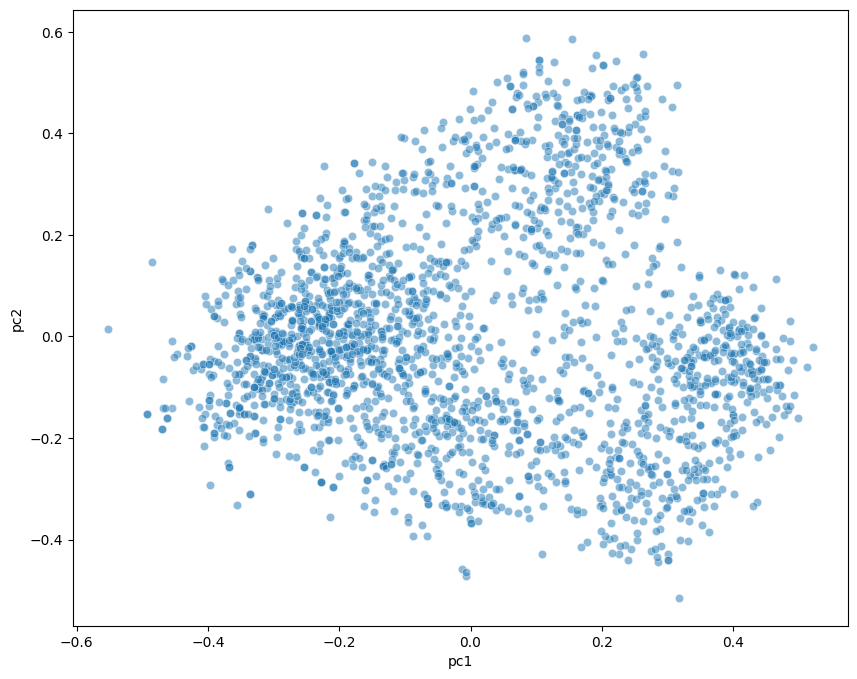

In [107]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=df,
    x="pc1",
    y="pc2",
    alpha=0.5,
)

### Task 2

Print out several articles that are close to one another on the scatterplot above. Is their content similar?


In [88]:
tmp = df[
    df["pc1"].between(-0.1, 0.1) &
    df["pc2"].between(-0.5, -0.4)
]

for index, row in tmp.iterrows():
    print(row["category"])
    print(row["text"])
    print("-" * 100)


entertainment
sideways dominates spirit awards the comedy sideways has dominated this year s independent spirit awards  winning all six of the awards for which it was nominated.  it was named best film while alexander payne won best director and best screenplay  along with writing partner jim taylor. it also won acting awards for stars paul giamatti  thomas haden church and virginia madsen. sideways is tipped to do well at sunday s oscars  with five nominations.  the awards  now in their 20th year  are given to films made outside the traditional studio system  and are traditionally held the day before the oscars. other winners included catalina sandino moreno  who took best actress for her role as a drug smuggler in the colombian drama maria full of grace. moreno is also nominated for best actress at the oscars. the best first screenplay award went to joshua marston for maria full of grace. scrubs star zach braff won the award for best first feature for garden state  which he wrote  di

### Task 3

- Cluster the articles into three clusters using k-means clustering.
- Visualize the clusters on a scatterplot.
- Do the clusters have something in common in terms of article category?


<Axes: xlabel='pc1', ylabel='pc2'>

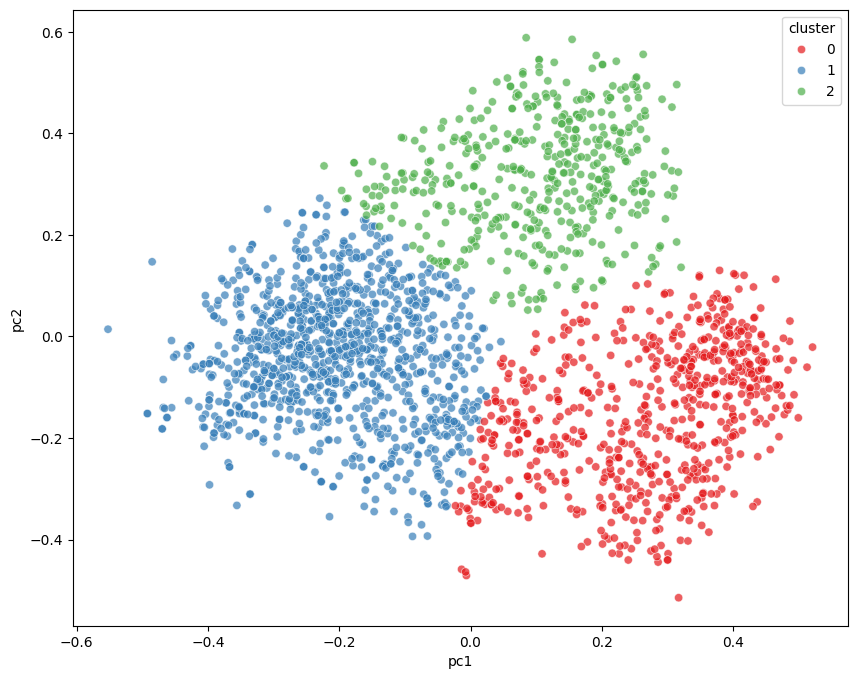

In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df[["pc1", "pc2"]])

df['cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="pc1", 
    y="pc2", 
    hue="cluster",
    palette="Set1",
    alpha=0.7
)


In [118]:
df.groupby(["cluster", "category"]).size()

cluster  category     
0        entertainment    146
         politics           3
         sport            505
         tech               5
1        business         455
         entertainment    237
         politics          13
         tech             394
2        business          55
         entertainment      3
         politics         401
         sport              6
         tech               2
dtype: int64

<Axes: xlabel='pc1', ylabel='pc2'>

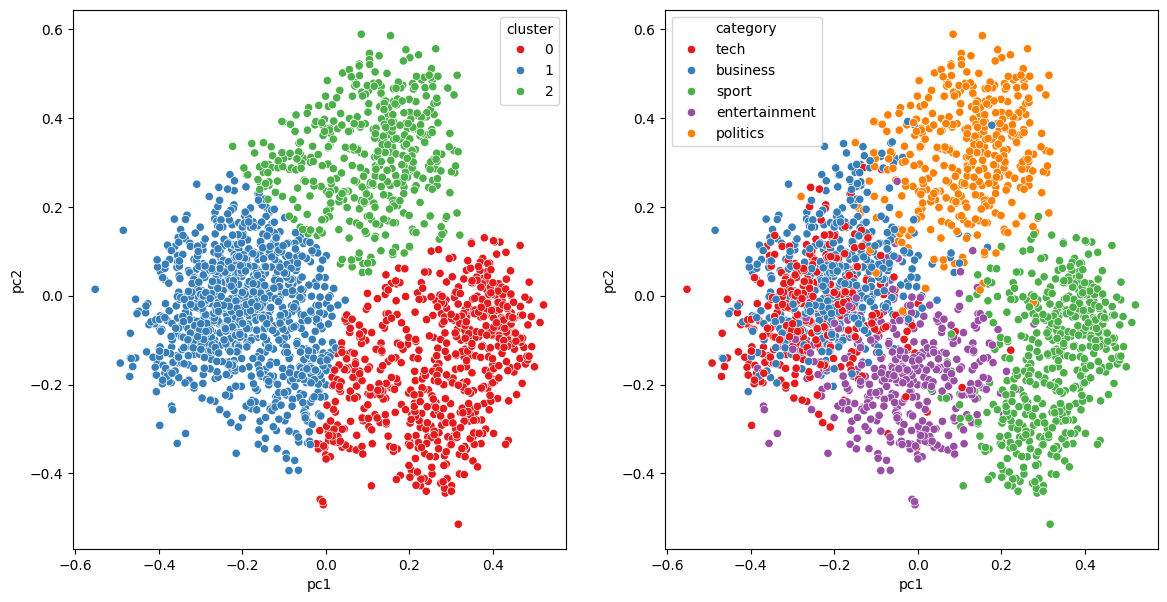

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(
    data=df,
    x="pc1", 
    y="pc2", 
    hue="cluster",
    palette="Set1",
    ax=axs[0]
)

sns.scatterplot(
    data=df,
    x="pc1", 
    y="pc2", 
    hue="category",
    palette="Set1",
    ax=axs[1]
)


### Task 4

Find the optimal number of clusters bit fitting kmeans multiple times for increasing number of `n_clusters`.


Text(0, 0.5, 'inertia')

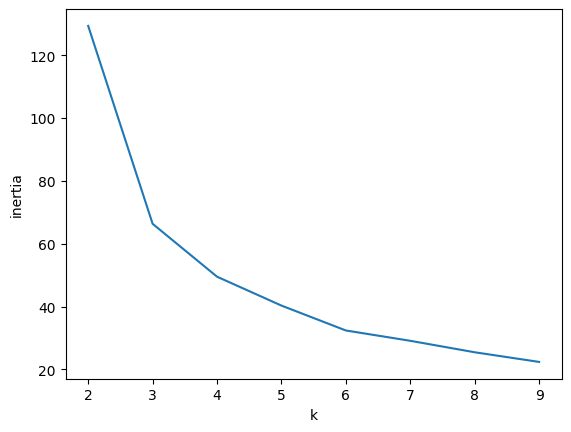

In [123]:
ks = range(2, 10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["pc1", "pc2"]])
    inertias.append(kmeans.inertia_)

ax = sns.lineplot(x=ks, y=inertias)
ax.set_xlabel("k")
ax.set_ylabel("inertia")


## Task 5

Fit kmeans with another value for n_clusters and visualize the clusters. Show which article categories belong to the clusters. 


<Axes: xlabel='pc1', ylabel='pc2'>

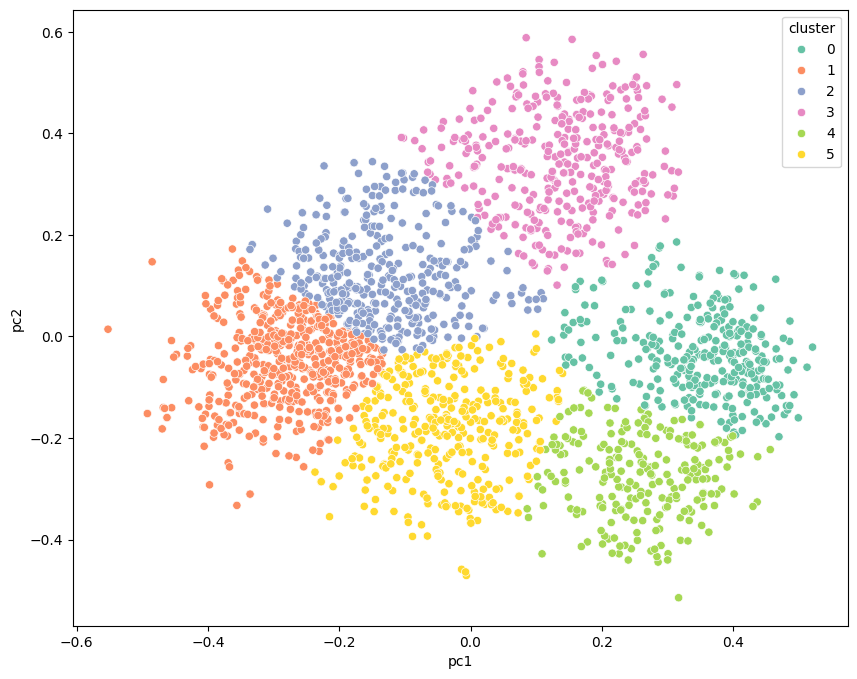

In [129]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(df[["pc1", "pc2"]])

df['cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="pc1", 
    y="pc2", 
    hue="cluster",
    palette="Set2"
)


In [130]:
df.groupby(["cluster", "category"]).size()

cluster  category     
0        business           1
         entertainment      7
         politics          10
         sport            298
         tech               1
1        business         241
         entertainment     44
         tech             282
2        business         240
         entertainment     12
         politics          53
         tech              72
3        business          10
         entertainment      1
         politics         353
4        entertainment     32
         sport            205
5        business          18
         entertainment    290
         politics           1
         sport              8
         tech              46
dtype: int64

## Task 6

Train a model (RandomForest or LogisticRegression) for predicting whether an article belongs to the politics category. The model `pipeline` should take the full embedding as input and perform PCA before feeding it into the next steps of the pipeline. You should also perform hyperparameter tuning for at least one hyperparameter.

As the last step, report the performance of the model.


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

y = df["category"] == "politics"
X = emb_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [82]:
model = Pipeline([
    ("pca", PCA(n_components=10)),
    ("poly", PolynomialFeatures(degree=2)),
    ("logreg", LogisticRegression(penalty="l2"))
])

model.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=10)), ('poly', PolynomialFeatures()),
                ('logreg', LogisticRegression())])

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "logreg__C": [10**i for i in range(-6, 6)],
    "logreg__class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_


{'logreg__C': 10000, 'logreg__class_weight': None}

In [84]:
from sklearn.metrics import classification_report

In [85]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.99      0.99      0.99       365
        True       0.96      0.94      0.95        80

    accuracy                           0.98       445
   macro avg       0.97      0.96      0.97       445
weighted avg       0.98      0.98      0.98       445



### Task 7

Calculate feature importances of the principal components.


<Axes: >

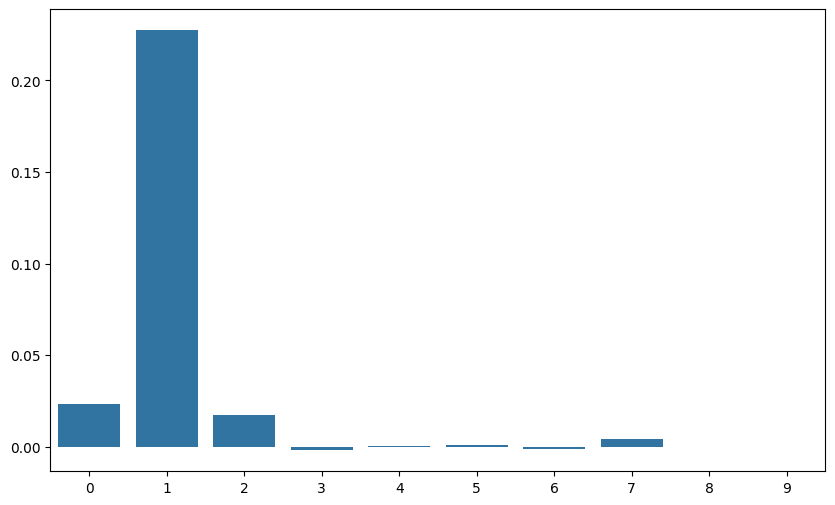

In [88]:
from sklearn.inspection import permutation_importance

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("logreg", LogisticRegression())
])
model.fit(X_train_pca, y_train)

perm_imp = permutation_importance(model, X_test_pca, y_test, n_repeats=10)
imps = perm_imp.importances_mean

plt.figure(figsize=(10, 6))
sns.barplot(y=imps, x=range(10))
